# IBM HR attrition analysis

In this project, I decided to analyze the IBM HR Analytics Employee Attrition and Performance with 6 steps of CRISP-DM:  
>    1. Business Understanding  
>    2. Data Understanding  
>    3. Prepare data  
>    4. Model data  
>    5. Evaluation results  
>    6. Deployment  

### Business Understanding



This is a structured data structure created by IBM data scientists. To explore factors that lead to employee attrition and to explore important questions, such as comparing employee attrition levels across departments, i decided to answer below questions:
>    - Which department has the highest employee attrition rate?
>    - Which job role has the highest employee attrition rate?
>    - What are the most influential features affect the attrition?

### Import Required Libraries

In [69]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import random 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from eli5.sklearn import PermutationImportance

#### Load data

In [70]:
 # read the dataset 
dataFile = './dataset/HR-Employee-Attrition.csv'
df = pd.read_csv(dataFile)

I show the first 5 rows of the dataframe to get a quick look into the data

In [71]:
#show first 5 rows of dataset
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


An overview about the data types of the columns

In [72]:
#show all types of features in the dataset
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### Describe the dataset

In [73]:
#show the shape of dataset
df.shape

(1470, 35)

The data has 1470 rows and 35 columns.

Some statiscal metrics with describe method

In [74]:
#show statiscal metrics of features in dataset
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Data preparation

In [75]:
# drop StandardHours column and Over18 columns 

'''Because StandardHours and Over18  have constant values with each feature and do not provide any useful information for the following analyses 
so i need to drop them from dataframe''' 

df = df.drop(["StandardHours", "Over18"], axis=1)

In [76]:
'''We need to convert some of the string (text) columns into numerical values. Convert their values
 into 0 or 1 by using the apply function'''

df["Attrition"] = df["Attrition"].apply(lambda x: 0 if x == "No" else 1)
df["Gender"] = df["Gender"].apply(lambda x: 0 if x == "Male" else 1)
df["OverTime"] = df["OverTime"].apply(lambda x: 0 if x == "No" else 1)

In [77]:
'''Because businessTravel has 3 different values, but these values can be ordered in a meaningful way:
Non-Travel,Travel_Rarely,Travel_Frequently so we will use a dictionary and the apply function to convert 
this column.'''

dictTravel = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}
df["BusinessTravel"] = df["BusinessTravel"].apply(lambda x: dictTravel[x])

In [78]:
'''MaritalStatus conatins of 3 different values, too. But unfortunately they cannot be ordered,
therefore we will convert this column by one-hot-encoding, which means we will create a column for 
each of the 3 values.'''

listMarital = list(df["MaritalStatus"].unique())
for strMarital in listMarital:
    df[strMarital] = df["MaritalStatus"].apply(lambda x: 1 if x == strMarital else 0)

'''After applying one-hot-encoding, we do not need this column anymore. Therefore, we can drop it'''

df = df.drop(["MaritalStatus"], axis=1)

Now let's take a look at the result of this data processing.

In [79]:
df[["EmployeeCount", "Attrition", "Gender", "OverTime",
    "BusinessTravel", "Single", "Married", "Divorced"]].head()

,EmployeeCount,Attrition,Gender,OverTime,BusinessTravel,Single,Married,Divorced
0,1,1,1,1,1,1,0,0
1,1,0,0,0,2,0,1,0
2,1,1,0,1,1,1,0,0
3,1,0,1,1,2,0,1,0
4,1,0,0,0,1,0,1,0


#### Descriptive Analytics

##### Question 1: Which department has the highest employee attrition rate?

In [80]:
#The percentage of employees leaving by department 

dfDepartment = df[["Department", "Attrition", "EmployeeCount"]].groupby("Department").sum().reset_index()
dfDepartment["Share"] = dfDepartment["Attrition"] / dfDepartment["EmployeeCount"]

In [81]:
dfDepartment #Show the attrition rate department data

,Department,Attrition,EmployeeCount,Share
0,Human Resources,12,63,0.190476
1,Research & Development,133,961,0.138398
2,Sales,92,446,0.206278


<AxesSubplot:title={'center':'Share of attrition by department'}, xlabel='Department'>

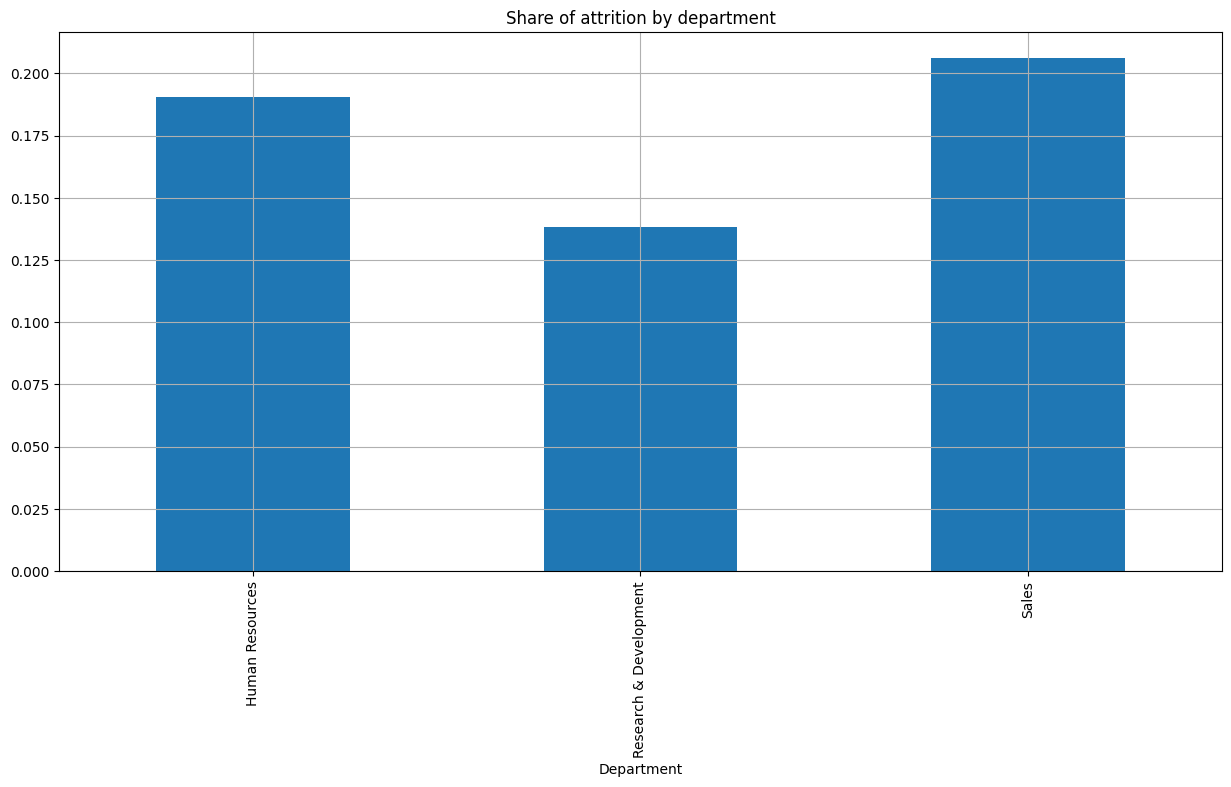

In [82]:
#Visualize the rate attrition

dfDepartment.plot.bar(x = "Department", y="Share", title="Share of attrition by department",
               figsize=(15,7), legend=False, grid=True)

In the chart above, we can see that Sales Department has the highest attrition rate (20.63%) and Research and Development Department has the lowest attrition rate (13.84%)

How many employees do we have per department?

<AxesSubplot:title={'center':'Number of employees by department'}, xlabel='Department'>

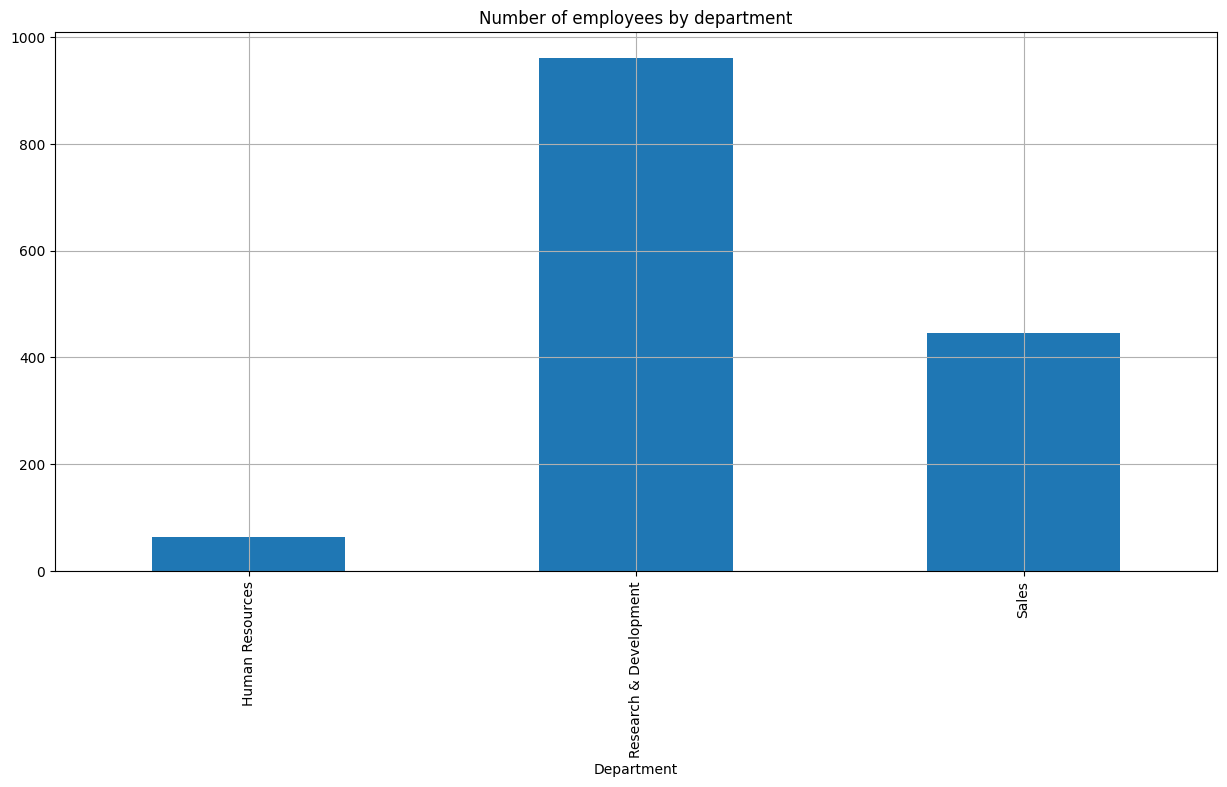

In [83]:
#visualize the EmployeeCount per Department
dfDepartment.plot.bar(x = "Department", y="EmployeeCount", title="Number of employees by department",
               figsize=(15,7), legend=False, grid=True)


The number of employees in the research and development department is the most (961 employees) and the number of employees is more than double that of the sales department. The number of employees in Human Resources is lowest (only 63 employees)

##### Question 2:Which job role has the highest employee attrition rate?

In [84]:
#The percentage of employees leaving by job role and department 
dfJob = df[["Department", "JobRole", "Attrition", "EmployeeCount"]]\
.groupby(["Department", "JobRole"]).sum().reset_index()

dfJob["Share"] = dfJob["Attrition"] / dfJob["EmployeeCount"]
dfJob["department_jobrole"] = dfJob["Department"] + " - " + dfJob["JobRole"] 



In [85]:
dfJob#Show attrion rate JobRole data

,Department,JobRole,Attrition,EmployeeCount,Share,department_jobrole
0,Human Resources,Human Resources,12,52,0.230769,Human Resources - Human Resources
1,Human Resources,Manager,0,11,0.000000,Human Resources - Manager
2,Research & Development,Healthcare Representative,9,131,0.068702,Research & Development - Healthcare Representa...
3,Research & Development,Laboratory Technician,62,259,0.239382,Research & Development - Laboratory Technician
4,Research & Development,Manager,3,54,0.055556,Research & Development - Manager
5,Research & Development,Manufacturing Director,10,145,0.068966,Research & Development - Manufacturing Director
6,Research & Development,Research Director,2,80,0.025000,Research & Development - Research Director
7,Research & Development,Research Scientist,47,292,0.160959,Research & Development - Research Scientist
8,Sales,Manager,2,37,0.054054,Sales - Manager
9,Sales,Sales Executive,57,326,0.174847,Sales - Sales Executive


<AxesSubplot:title={'center':'Share of attrition by department and job role'}, xlabel='department_jobrole'>

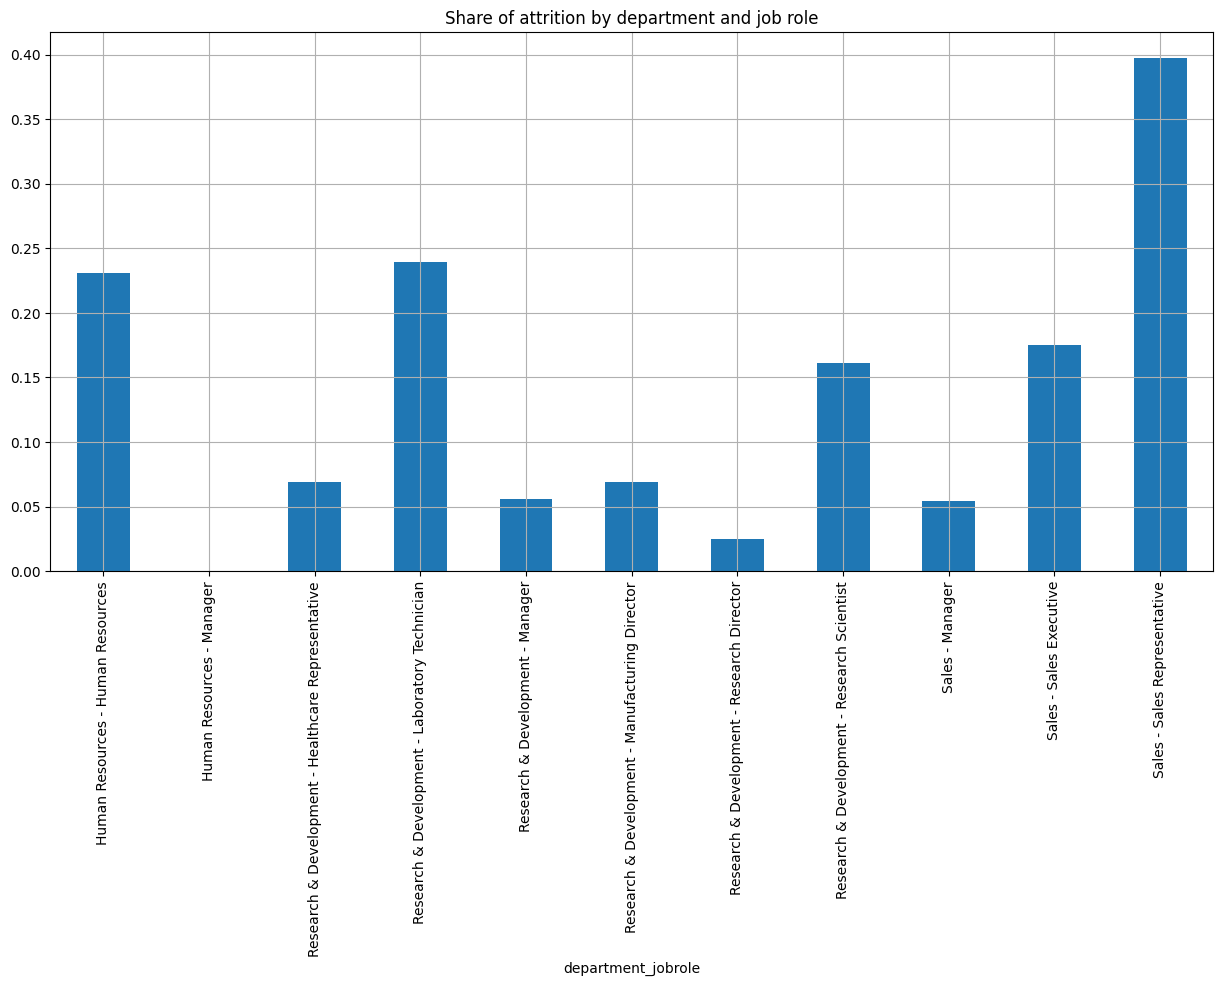

In [86]:
#Visualize the rate attrition by jobrole and department
dfJob.plot.bar(x = "department_jobrole", y="Share",
               title="Share of attrition by department and job role",
               figsize=(15,7), legend=False, grid=True)

As we can see from the graph,the The amount of employee attrition is concentrated in the job role human resource in Human Resourses Department. In Research and Development, Laboratory Technican and Research Scientist have the highest attrition rate and in Sales Department, the highest is Sales Representative and Sales Executive.

One more thing from the graph is the group of manager and director job role has lower attrition employee than others. 

<AxesSubplot:title={'center':'Number of employees by department and job role'}, xlabel='department_jobrole'>

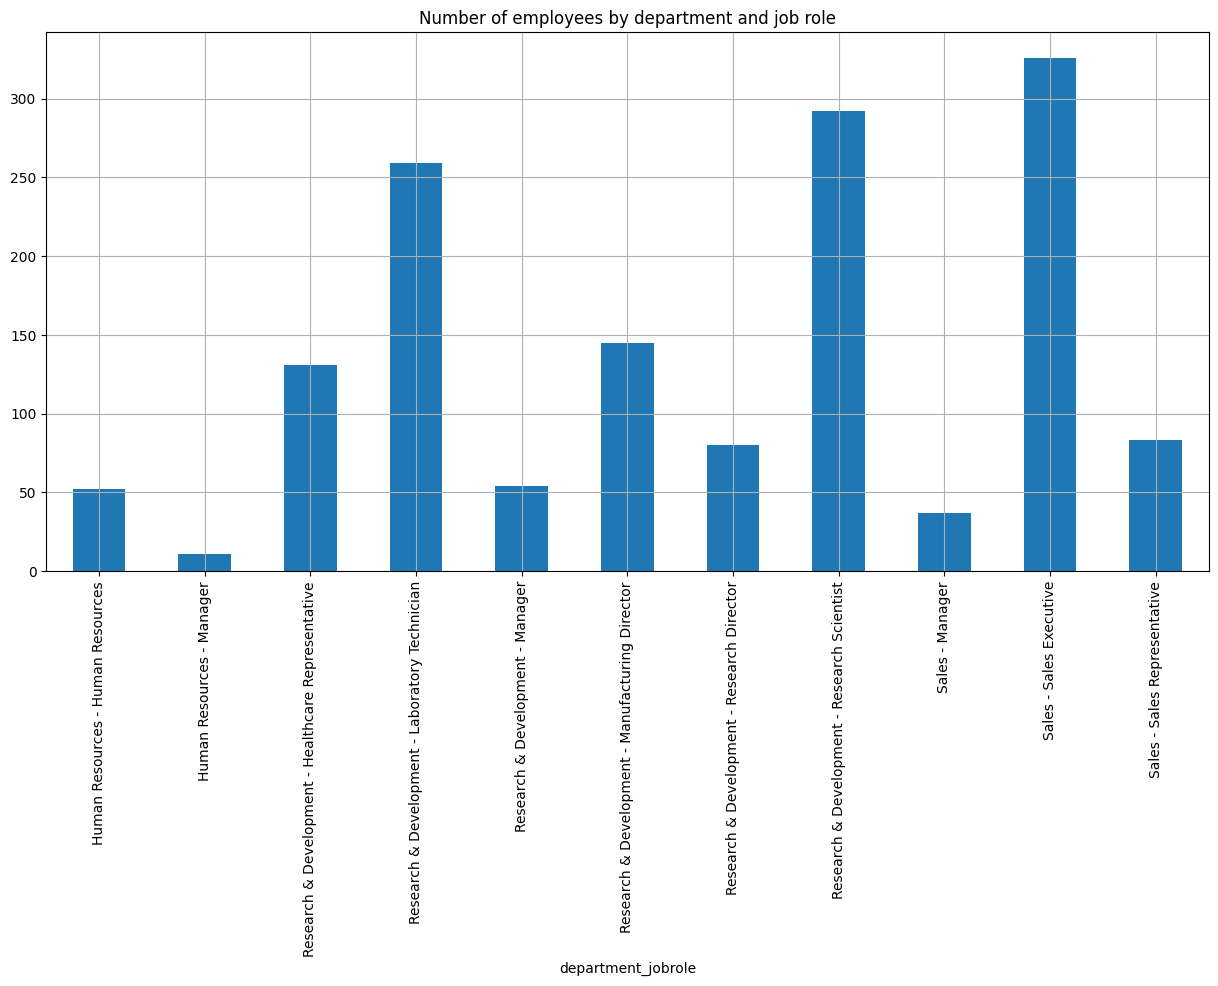

In [87]:
dfJob.plot.bar(x = "department_jobrole", y="EmployeeCount",
               title="Number of employees by department and job role",
               figsize=(15,7), legend=False, grid=True)

Look at the chart, we can see that the number of Sales Representative employees is low but the attrition is very high. Therefore, Most of attrition employees of Sales Department come from Sales Representative

#### Predictive Analytics

##### Question 3: What are the most influential features affect the attrition?

##### Data Preparation

In [88]:
#Remove a few unneeded columns and use the employee number as an index
dfML = df.copy()
dfML.index = dfML["EmployeeNumber"]
dfML = dfML.drop(["Department", "EducationField", "JobRole", "EmployeeCount", "EmployeeNumber"], axis=1)

In [89]:
#Split the data set into attrition and no attrition
dfML_0 = dfML[dfML["Attrition"] == 0].copy()
dfML_1 = dfML[dfML["Attrition"] == 1].copy()

print("Number of no attritions: " + str(len(dfML_0)))
print("Number of attritions: " + str(len(dfML_1)))

Number of no attritions: 1233
Number of attritions: 237


Because the dataset is imbalanced and this is bad for a classification , we handle this by choosing a random sample out of the larger class .

In [90]:
import random

arrRandom = random.sample(range(len(dfML_0)), len(dfML_1))
dfML_0 = dfML_0.iloc[arrRandom]
print("Number of no attritions (sample): " + str(len(dfML_0)))

Number of no attritions (sample): 237


After solving imbalanced data problem, we merge both datasets again.

In [91]:
dfML_final = dfML_0.append(dfML_1, sort=False)

##### Test-Train-Split

In [92]:
X = dfML_final.drop(["Attrition"], axis=1).copy()
y = dfML_final["Attrition"].copy()

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

##### Train the Random Forest Classifier

In [94]:
# create model with default parameters
clf = RandomForestClassifier()
# train model on data
clf.fit(X_train, y_train)

RandomForestClassifier()

##### Evaluation

In [95]:
#Employee attrition prediction list
y_pred = clf.predict(X_test) 

In [96]:
#Accuracy
fltAcc = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(fltAcc))

Accuracy: 0.6751592356687898


In [97]:
#Precision 
fltPre = precision_score(y_test, y_pred)
print("Precision: " + str(fltPre))

Precision: 0.7323943661971831


In [98]:
#Recall of model
fltRec = recall_score(y_test, y_pred)
print("Recall: " + str(fltRec))

Recall: 0.6190476190476191


In [99]:
#F1 score
fltF1 = f1_score(y_test, y_pred)
print("F1: " + str(fltF1))

F1: 0.6709677419354839


##### Feature Importance

In [100]:
dfImpImp = pd.DataFrame(clf.feature_importances_, index=X.columns,
                        columns=["impurity"])
dfImpImp = dfImpImp.sort_values("impurity", ascending=False)
dfImpImp.head(29)

,impurity
MonthlyIncome,0.070729
Age,0.062840
TotalWorkingYears,0.059563
StockOptionLevel,0.057017
MonthlyRate,0.053339
DailyRate,0.051878
HourlyRate,0.051759
EnvironmentSatisfaction,0.051545
YearsAtCompany,0.050924
DistanceFromHome,0.042864


Monthly Incomes appears to be the top indicator that affects the employee attrition.

